# Cleaned Final Sample #

We examined 9999 galaxies by eye while observing at WIYN 0.9m telescope in Feb 2020.

Made cutouts for each galaxy, 50 galaxies per sheet.


In [2]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
%matplotlib inline

In [3]:
import sys
sys.path.append('/home/rfinn/github/APPSS/')
from a100sdss import colormass

# Creating Cutouts #


# Reviewing Single Images #

In [3]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [4]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  60


[1881, 9515]

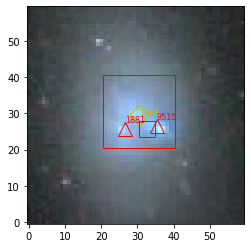

In [5]:
t.one_gal(1881,imsize=60,dssflag=False)

problem accessing image
cutouts/legacy-im-109.40918--22.35183-60.fits
http://legacysurvey.org/viewer/cutout.fits?ra=109.40918&dec=-22.351828&layer=dr8&size=60&pixscale=1.00
trouble in paradise 3959
maybe coords are outside Legacy Survey?
109.40918 -22.351828
using DSS2 image  cutouts/DSS2-109.40918--22.35183-60-1arcsecpix.fits
cutout image size is  60


[3959, 4031]

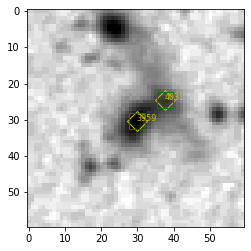

In [6]:
t.one_gal(3959,imsize=60,dssflag=False)

# Downloading Spreadsheet with by-eye Classifications#

spreadsheet is at

https://docs.google.com/spreadsheets/d/1GtvYTBU3tAXI7ngklFWms3WpnGhbzpp3Nn-_VO7sioc/edit?usp=sharing

Download as a xlsx file.  Will get saved in ~/Downloads/

In [8]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
!mv /home/rfinn/Downloads/virgo_check_sample_by_eye.xlsx virgo_check_sample_by_eye.finished.xlsx

In [9]:
!ls -lth

total 119M
-rw-rw-r-- 1 rfinn rfinn 909K Mar 24 17:35 virgo_check_sample_by_eye.finished.xlsx
-rw-rw-r-- 1 rfinn rfinn  40M Mar 24 16:09 clean_kitchen_sink.fits
-rw-rw-r-- 1 rfinn rfinn 1.2M Mar 24 16:09 clean_sample.fits
-rw-rw-r-- 1 rfinn rfinn 977K Mar 16 13:30 virgo_check_sample_by_eye.csv
-rw-rw-r-- 1 rfinn rfinn  13K Mar  2 01:48 magnitude-histogram-HL.pdf
-rw-rw-r-- 1 rfinn rfinn  18K Mar  2 01:45 sfr-mstar.pdf
-rw-rw-r-- 1 rfinn rfinn  14K Mar  2 01:45 mstar-hist.pdf
-rw-rw-r-- 1 rfinn rfinn 257K Mar  2 00:47 positions-vr.pdf
-rw-rw-r-- 1 rfinn rfinn  97K Mar  2 00:39 NUVr-Mr.pdf
-rw-rw-r-- 1 rfinn rfinn  92K Mar  2 00:34 filament-color-vel-slice.pdf
-rw-rw-r-- 1 rfinn rfinn 488K Mar  1 22:45 clean_sample.txt
-rw-rw-r-- 1 rfinn rfinn 6.5M Mar  1 04:17 z0MGS_tbl.fits
-rw-rw-r-- 1 rfinn rfinn  12M Mar  1 04:11 z0MGS_tbl.tbl
-rw-rw-r-- 1 rfinn rfinn 5.4M Mar  1 03:09 z0MGS_tbl.csv
drwxrwxr-x 2 rfinn rfinn 1.5M Feb 28 03:30 cutouts
drwxrwxr-x 2 rfinn rfinn  12K Feb 28 03:12 plots
-

# Merging sheets in downloaded spreadsheet #

In [10]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/collate_check_by_eye_results.py

number of objects with class=1 =  8710
number of objects to be removed (class=0, 2, 4) =  749
number of objects with class 0  =  188
number of objects with class 1  =  8710
number of objects with class 2  =  518
number of objects with class 3  =  0
number of objects with class 4  =  43
number of objects with class 5  =  0
number of objects with class 6  =  0
number of objects with class 7  =  508
number of objects with class 8  =  7
number of objects with class 9  =  3
number of objects with class 16  =  20
percent of sample removed = 7.5
DEC > -1 galaxies only
number of objects with class=1 =  6546
number of objects to be removed (class=0, 2, 4) =  623
number of objects with class 0  =  116
number of objects with class 1  =  6546
number of objects with class 2  =  466
number of objects with class 3  =  0
number of objects with class 4  =  41
number of objects with class 5  =  0
number of objects with class 6  =  0
number of objects with class 7  =  304
number of objects with class 8  

In [11]:
flag = df.df['class']==9
ids = df.df['galnumber'][flag]
print(ids)

6556    6556
8822    8822
9146    9146
Name: galnumber, dtype: int64


Plot postage stamps for these galaxies

In [19]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


<Figure size 432x288 with 0 Axes>

In [20]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  60
6556 :  [6556]
cutout image size is  60
8822 :  [8822]
cutout image size is  60
9146 :  [9146]


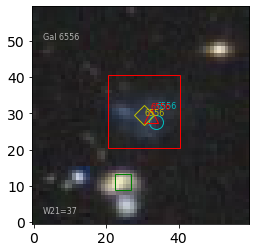

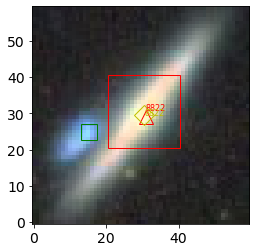

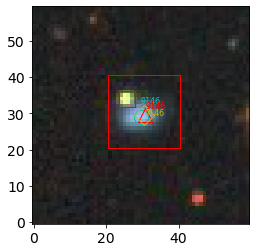

In [22]:
ids = [6556, 8822, 9146]
for i in ids:
    a = t.one_gal(i,imsize=60,dssflag=False)
    print(i,': ',a)

# Applying by-eye classifications to clean the catalog #

this program will create clean_kitchen_sink.fits 

and
* clean_sample.fits
* clean_sample.txt

The last one is what we upload to IRSA (see next step)

In [25]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py

In [26]:
!ls -lth

total 61M
-rw-rw-r-- 1 rfinn rfinn 488K Mar  1 03:08 clean_sample.txt
-rw-rw-r-- 1 rfinn rfinn 1.2M Mar  1 03:08 clean_sample.fits
-rw-rw-r-- 1 rfinn rfinn 977K Mar  1 03:06 virgo_check_sample_by_eye.csv
-rw-rw-r-- 1 rfinn rfinn 909K Mar  1 03:06 virgo_check_sample_by_eye.finished.xlsx
-rw-rw-r-- 1 rfinn rfinn 5.4M Mar  1 03:00 z0MGS_tbl.csv
drwxrwxr-x 2 rfinn rfinn 1.5M Feb 28 03:30 cutouts
drwxrwxr-x 2 rfinn rfinn  12K Feb 28 03:12 plots
-rw-rw-r-- 1 rfinn rfinn 872K Feb 25 00:28 virgo_check_sample_by_eye.xlsx
-rw-rw-r-- 1 rfinn rfinn  43M Feb 24 12:59 smart_kitchen_sink.fits
-rw-rw-r-- 1 rfinn rfinn 6.0M Feb 24 12:59 temp.fits
-rw-rw-r-- 1 rfinn rfinn 312K Feb 24 03:11 positions-only.png
-rw-rw-r-- 1 rfinn rfinn  21K Feb 24 03:10 velhist.png


In [5]:
os.chdir('/home/rfinn/research/Virgo/supersample/')

In [6]:
cleancat = fits.getdata('clean_kitchen_sink.fits')

In [7]:
cleancat.columns

ColDefs(
    name = 'objname'; format = '28A'
    name = 'objtype'; format = '1A'
    name = 'de2000'; format = 'D'
    name = 'al2000'; format = 'D'
    name = 'v'; format = 'D'
    name = 'e_v'; format = 'D'
    name = 'vopt_1'; format = 'D'
    name = 'e_vopt'; format = 'D'
    name = 'vrad'; format = 'D'
    name = 'e_vrad'; format = 'D'
    name = 'bt'; format = 'D'
    name = 'e_bt'; format = 'D'
    name = 'type'; format = '4A'
    name = 'bar'; format = '1A'
    name = 'ring'; format = '1A'
    name = 'multiple'; format = '1A'
    name = 'compactness'; format = '1A'
    name = 't'; format = 'D'
    name = 'e_t'; format = 'D'
    name = 'logd25'; format = 'D'
    name = 'e_logd25'; format = 'D'
    name = 'logr25'; format = 'D'
    name = 'e_logr25'; format = 'D'
    name = 'pa'; format = 'D'
    name = 'incl'; format = 'D'
    name = 'logdc'; format = 'D'
    name = 'btc'; format = 'D'
    name = 'itc'; format = 'D'
    name = 'ubtc'; format = 'D'
    name = 'bvtc'; format = 'D

# Match to Leroy+2019 Catalog#

catalog is served by IRSA

https://irsa.ipac.caltech.edu/data/WISE/z0MGS/overview.html

https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?submit=Select&projshort=Contributed_Data_Sets

* select z0MGS DR1 Index 	86 	15738 	help
* multi-object search

* upload clean_sample.txt
* select one-to-one match
* LONG FORM
* run query
* click on save icon
* save as a ipac
* will go to ~/Downloads/

In [4]:
!mv /home/rfinn/Downloads/irsa_catalog_search_results_tbl.tbl  z0MGS_tbl.tbl

mv: cannot stat '/home/rfinn/Downloads/irsa_catalog_search_results_tbl.tbl': No such file or directory


In [5]:
!ls -lth 

total 95M
-rw-rw-r-- 1 rfinn rfinn 427K Mar 16 13:30 cleaned-sample.ipynb
-rw-rw-r-- 1 rfinn rfinn  60K Mar 14 17:23 90prime-observing.ipynb
-rw-rw-r-- 1 rfinn rfinn  14K Mar 14 13:05 kennicutt_halpha.pdf
-rw-rw-r-- 1 rfinn rfinn 1.2M Mar  2 02:20 catalog-paper-plots.ipynb
-rw-rw-r-- 1 rfinn rfinn  14M Mar  1 02:34 sample-selection-2019.ipynb
-rw-rw-r-- 1 rfinn rfinn 747K Feb 29 00:06 VirgoFilaments.ipynb
-rw-rw-r-- 1 rfinn rfinn 600K Feb 18 16:34 sample.ipynb
-rw-rw-r-- 1 rfinn rfinn 4.9K Feb 18 16:34 using-rungalfit.ipynb
-rw-rw-r-- 1 rfinn rfinn 454K Feb 18 16:34 calibrate-zeropoint.ipynb
-rw-rw-r-- 1 rfinn rfinn 129K Feb 18 16:34 issi_prop_2017.ipynb
-rw-rw-r-- 1 rfinn rfinn 671K Feb 18 16:34 Spring-2019-proposals.ipynb
-rw-rw-r-- 1 rfinn rfinn 925K Feb 18 16:34 NSFprop.ipynb
-rw-rw-r-- 1 rfinn rfinn 219K Feb 18 16:34 FYRF-Fall2016.ipynb
-rw-rw-r-- 1 rfinn rfinn 207K Feb 18 16:34 KPNO-2018A-Halpha-proposal.ipynb
-rw-rw-r-- 1 rfinn rfinn 402K Feb 18 16:34 KPNO-2018A-observing.ipynb


# Convert table into format that astropy likes #

* download table in ipac format
* upload table into topcat
* save as a fits-basic table
* read in to python

# Plot SF Main Sequence #

In [6]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
c = fits.getdata('z0MGS_tbl.fits')
c = Table(c)

In [7]:
c

cntr_01,dist_x,pang_x,galid_01,ra_01,dec_01,major_01,pgc_name,pgc,ra,dec,gl_deg,gb_deg,resolution,has_fuv,has_nuv,has_wise1,has_wise2,has_wise3,has_wise4,time_fuv,time_nuv,afuv,anuv,rms_fuv,std_fuv,rms_nuv,std_nuv,rms_wise1,std_wise1,rms_wise2,std_wise2,rms_wise3,std_wise3,rms_wise4,std_wise4,sat_effects_fuv,star_area_fuv,star_flux_fuv,star_flag_fuv,sat_effects_nuv,star_area_nuv,star_flux_nuv,star_flag_nuv,sat_effects_wise1,star_area_wise1,star_flux_wise1,star_flag_wise1,sat_effects_wise2,star_area_wise2,star_flux_wise2,star_flag_wise2,sat_effects_wise3,star_area_wise3,star_flux_wise3,star_flag_wise3,sat_effects_wise4,star_area_wise4,star_flux_wise4,star_flag_wise4,galaxy_mask_overlap,galaxy_overlap_flag,flux_fuv,rms_flux_fuv,std_flux_fuv,flux_nuv,rms_flux_nuv,std_flux_nuv,flux_wise1,rms_flux_wise1,std_flux_wise1,flux_wise2,rms_flux_wise2,std_flux_wise2,flux_wise3,rms_flux_wise3,std_flux_wise3,flux_wise4,rms_flux_wise4,std_flux_wise4,dist_mpc,e_dist_dex,mtol,method_mtol,logmass,e_logmass,logsfr,e_logsfr,method_sfr,deltams,absbtc,complete_sample,summary_url
int64,float64,float64,int64,float64,float64,float64,str11,int64,float64,float64,float64,float64,str11,int32,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,int32,int32,float64,float64,int32,int32,float64,float64,int32,int32,float64,float64,int32,int32,float64,float64,int32,int32,float64,float64,int32,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,float64,float64,float64,float64,str11,float64,float64,int32,str62
1,nan,nan,0,200.57466125,-30.154275894,10.0,,-9223372036854775808,nan,nan,nan,nan,,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,nan,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,,nan,nan,-2147483648,
2,nan,nan,1,182.14326477,-30.148302078,10.0,,-9223372036854775808,nan,nan,nan,nan,,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,nan,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,,nan,nan,-2147483648,
3,nan,nan,2,195.60629272,-30.108865738,10.0,,-9223372036854775808,nan,nan,nan,nan,,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,nan,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,,nan,nan,-2147483648,
4,nan,nan,3,181.33895874,-30.046159744,10.0,,-9223372036854775808,nan,nan,nan,nan,,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,-2147483648,nan,nan,-2147483648,nan,-2147483648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,,nan,nan,-2147483648,
5,nan,nan,4,200.0584259,-30.035982132,1

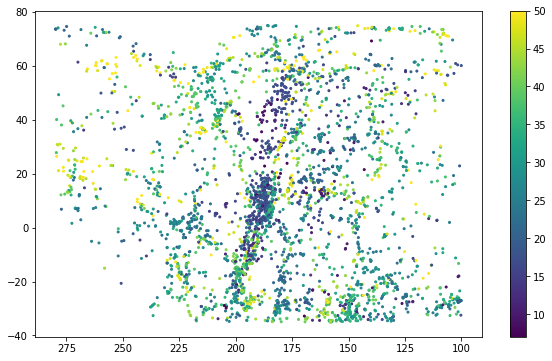

In [7]:
# plot positions of matched sources
v2 = int(3500./70)
v1 = int(500./70)
plt.figure(figsize=(10,6))
plt.scatter(c['ra_01'],c['dec_01'],c=c['dist_mpc'],vmin=v1,vmax=v2,s=4)
plt.gca().invert_xaxis()
plt.colorbar()

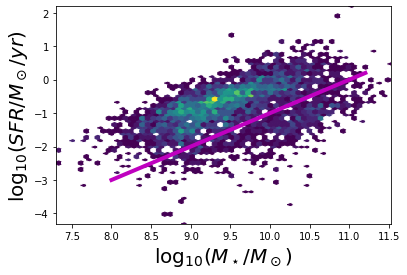

In [35]:
plt.figure()


cm = plt.cm.viridis
cm.set_under((1,1,1))
plt.hexbin(c['logmass'],c['logsfr'],gridsize=60,vmin=1,cmap=cm)#cmap='viridis')
#colormass(c['logmass'],c['logsfr'])
plt.xlabel('$\log_{10}(M_\star /M_\odot)$',fontsize=20)
plt.ylabel('$\log_{10}(SFR/M_\odot/yr)$',fontsize=20)
ssfr_limit = -11
xl = np.linspace(8,11.2,100)
plt.plot(xl,xl-11,'m-',lw=4)
plt.savefig('sfr-mstar.pdf')

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


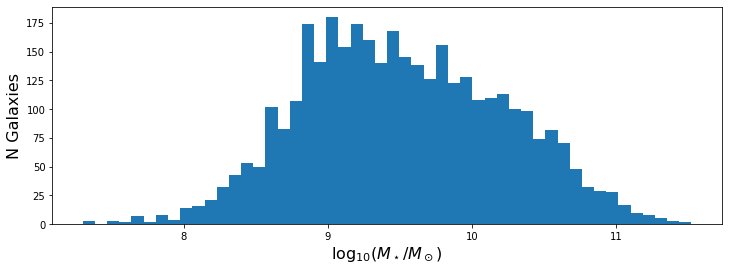

In [14]:
plt.figure(figsize=(12,4))
#flag =  (c['has_wise1'] == '1) & ((c['has_nuv'] == '1') |(c['has_wise4'] == '1'))
#mybins = np.arange(0,350,50)
t =plt.hist(c['logmass'],bins=50)#,bins=mybins)
plt.xlabel('$\log_{10}(M_\star/M_\odot)$',fontsize=16)
plt.ylabel('N Galaxies',fontsize=16)
#plt.xticks(np.arange(0,350,50))
plt.savefig('mstar-hist.pdf')


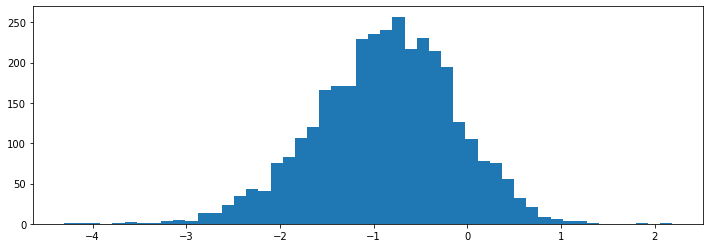

In [95]:
plt.figure(figsize=(12,4))
#flag =  (c['has_wise1'] == '1) & ((c['has_nuv'] == '1') |(c['has_wise4'] == '1'))
#mybins = np.arange(0,350,50)
t =plt.hist(c['logsfr'],bins=50)#,bins=mybins)
#plt.xticks(np.arange(0,350,50))


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


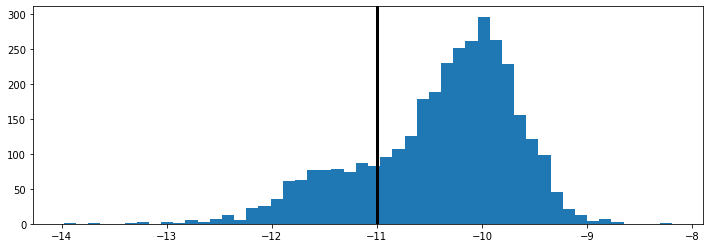

In [36]:
plt.figure(figsize=(12,4))
ssfr = c['logsfr'] - c['logmass']
t =plt.hist(ssfr,bins=50)#,bins=mybins)
plt.axvline(x=-11,c='k',lw=3)

# Matching to ALFALFA $\alpha$100#

- we matched to the AGC, but this catalog is not published.  The origin of some of the galaxies are unclear.

In [13]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [14]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  120
6970 :  [6970]
downloading image  cutouts/legacy-im-156.27031-17.16370-120.jpg
downloading image  cutouts/legacy-im-156.27031-17.16370-120.fits
cutout image size is  120
7756 :  [7756, 9629, 9630]
downloading image  cutouts/legacy-im-156.28349-17.15507-120.jpg
downloading image  cutouts/legacy-im-156.28349-17.15507-120.fits
cutout image size is  120
9629 :  [7756, 9629, 9630]


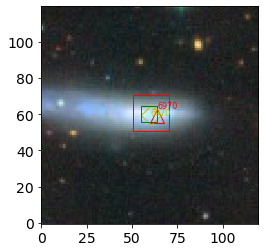

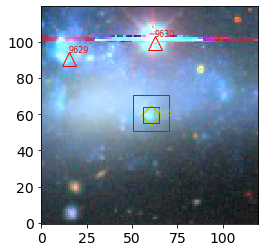

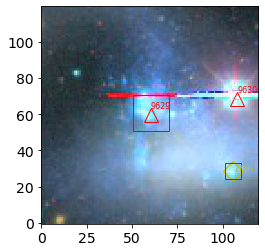

In [18]:
ids = [6970,7756,9629]
for i in ids:
    a = t.one_gal(i,imsize=120,dssflag=False)
    print(i,': ',a)

# Downloading Dust Extinction from IRSA #

- Saved the file in vf-z0MGS.tbl in ~/research/Virgo/tables
- downloaded a line-matched table.
- matched to 15arcsec resolution z0MGS catalog

In [19]:
mgs = ascii.read('/home/rfinn/research/Virgo/tables/vf-z0MGS.tbl', format='ipac')

In [23]:
matchflag = ~mgs['complete_sample'].mask
print(sum(matchflag))

3598


Can now use stellar mass and SFR for all galaxies with matches.

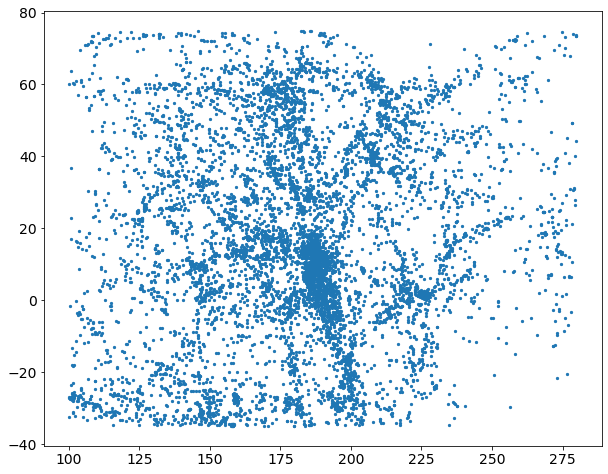

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(mgs['ra_01'],mgs['dec_01'],s=5)

# Steer+17 Table with Redshift-independent distances #

- Downloaded this from NED webpage
- http://ned.ipac.caltech.edu/Library/Distances/
- did a first matching in topcat, based on NED name
  - best match, symmetric, all from 1
  - found 2411 pairs
  - saved as fits-basic
  - ~/research/Virgo/tables/vf-steer17.fits
  
  
  


# 2MASS #

- doing 1-to-1 match in irsa to see how many have matches, 10 arcsec search radius
- matched to all-sky extended source catalog (is this the right one?, will super big galaxies be in here? emailed Vandana to get her input)
